In [2]:
import pandas as pd
from pathlib import Path

In [3]:
here = Path("__file__").parent
data_folder = here / "data"

roster = pd.read_csv(
    data_folder/"roster.csv",
    converters = {
                "NetID": str.lower, 
                "Email Address": str.lower
                },
    usecols = ["Section", "Email Address", "NetID"],
    index_col = "NetID"
)

# dataFrames.
hwcsv = pd.read_csv(
    data_folder/"hw_exam_grades.csv",
    converters = {
                "Email Address": str.lower,
                "SID": str.lower,
                "First Name": str.lower,
                "Last Name": str.lower
    },
    usecols= lambda x: "Submission" not in x,
    index_col = "SID"
)

quiz_grades = pd.DataFrame()

for file_path in data_folder.glob("quiz_*_grades.csv"):
    quiz_name = " ".join(file_path.stem.title().split("_")[:2])
    # print(file_path)
    quiz = pd.read_csv(
        file_path,
        converters = {
            "Email": str.lower
        },
        usecols=["Email", "Grade"],
        index_col="Email"
    ).rename(columns={"Grade": quiz_name})
    quiz_grades = pd.concat([quiz_grades, quiz], axis=1)



In [4]:
finalData = pd.merge(
    roster,
    hwcsv,
    left_index=True,
    right_index=True
)

finalData = pd.merge(
    finalData,
    quiz_grades,
    left_on = "Email Address",
    right_index = True
    
)

finalData = finalData.fillna(0)

# Average Exam score

for i in range(1,4):
    finalData[f"Exam {i} Score"] = (finalData[f"Exam {i}"] / finalData[f"Exam {i} - Max Points"])

In [5]:
    
homework_score = finalData.filter(regex=r"^Homework \d\d?$", axis = 1)
homework_max = finalData.filter(regex=r"^Homework \d\d? -", axis=1)

sum_hw_scores = homework_score.sum(axis=1)
sum_hw_maxpoints = homework_max.sum(axis=1)

finalData["Total Homework"] = sum_hw_scores / sum_hw_maxpoints

hw_max_renamed = homework_max.set_axis(homework_score.columns, axis=1)
hwaverage = ((homework_score / hw_max_renamed).round(2)).sum(axis=1)

quiz = finalData.filter(regex=r"^Quiz \d$", axis=1)
quiz_sum = quiz.sum(axis=1)

quiz_max_points = pd.Series(
    {"Quiz 1": 11, "Quiz 2": 15, "Quiz 3": 17, "Quiz 4": 14, "Quiz 5": 12}
)
quizmaxsum = quiz_max_points.sum()

finalData["Total quizzes"] = quiz_sum / quizmaxsum

finalData["Total quizzes"]
# quizaverage = list()

# for i in quiz_sum.index:
#     quizaverage.append(((quiz_sum[i]/quizmaxsum)*10).round(2))

# quizavg = pd.DataFrame()

# quizavg["abc"] = quiz_sum / quizmaxsum
# quizavg["def"] = ...


wxb12345    0.608696
mxl12345    0.681159
txj12345    0.594203
jgf12345    0.492754
smj00936    0.652174
              ...   
pmj37756    0.782609
dsl24347    0.623188
nxe44872    0.768116
bxr62103    0.797101
jxw53347    0.637681
Name: Total quizzes, Length: 150, dtype: float64

In [6]:
weightage = pd.Series({
    "Exam 1 score": 0.15,
    "Exam 2 score": 0.15,
    "Exam 3 score": 0.1,
    "Quiz Score" : 0.30,
    "Homework Score": 0.30    
})


finalData




,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz 5,Quiz 2,Quiz 4,Quiz 1,Quiz 3,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total Homework,Total quizzes
wxb12345,woody.barrera_jr@univ.edu,1,woody,barrera,55.0,80,62,80,73,80,...,10.0,10.0,7.0,4.0,11.0,0.86,0.62,0.90,0.808108,0.608696
mxl12345,malaika.lambert@univ.edu,2,malaika,lambert,63.0,80,57,80,78,80,...,6.0,10.0,13.0,8.0,10.0,0.60,0.91,0.93,0.827027,0.681159
txj12345,traci.joyce@univ.edu,1,traci,joyce,0.0,80,77,80,58,80,...,4.0,6.0,9.0,8.0,14.0,1.00,0.84,0.64,0.785135,0.594203
jgf12345,john.g.2.flower@univ.edu,3,gregg,flower,69.0,80,52,80,64,80,...,5.0,0.0,13.0,8.0,8.0,0.72,0.83,0.77,0.770270,0.492754
smj00936,stacy.johnson@univ.edu,2,stacy,johnson,74.0,80,55,80,60,80,...,7.0,14.0,7.0,6.0,11.0,0.96,0.80,0.86,0.782432,0.652174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmj37756,paul.johnson@univ.edu,3,paul,johnson,73.0,80,50,80,55,80,...,10.0,14.0,11.0,10.0,9.0,0.84,0.80,0.94,0.735135,0.782609
dsl24347,danielle.lee@univ.edu,3,danielle,lee,69.0,80,51,80,70,80,...,7.0,14.0,5.0,7.0,10.0,0.62,0.70,0.90,0.822973,0.623188
nxe44872,nicole.edwards@univ.edu,3,nicole,edwards,62.0,80,76,80,62,80,...,10.0,12.0,12.0,10.0,9.0,0.89,0.63,0.65,0.839189,0.768116
bxr62103,bailey.reyes@univ.edu,2,bailey,reyes,53.0,80,50,80,55,80,...,7.0,15.0,6.0,10.0,17.0,0.90,0.72,0.71,0.779730,0.797101


In [19]:
# Making an df from multiple series

s1 = pd.Series([1,2,3], index=['a','b','c'], name='Comun1')
s2 = pd.Series([4,5,6], index=['a','b','c'], name='Comun2')
s3 = pd.Series([7,8,9], index=['a','b','c'], name='Comun3')

df = pd.DataFrame({
    'Column1': s1,
    'Column2': s2,
    'Column3': s3,
})

# Reorder
df1 = df[['Column3', 'Column1', 'Column2']]

df2 = df.reindex(columns=['Column3', 'Column1', 'Column2'])

df2


,Column3,Column1,Column2
a,7,1,4
b,8,2,5
c,9,3,6


In [7]:
# Adding columns bassed on some conditions

s1 = pd.Series([1,2,3], name='Comun1')
s2 = pd.Series([4,5,6], name='Comun2')
s3 = pd.Series([7,8,9], name='Comun3')

df = pd.DataFrame({
    'Column1': s1,
    'Column2': s2,
    'Column3': s3
})

df['status'] = df['Column1'].apply(lambda x: 'High' if x>2 else 'Low')

df


,Column1,Column2,Column3,status
0,1,4,7,Low
1,2,5,8,Low
2,3,6,9,High


In [21]:
# Using .loc and .iloc
df = pd.DataFrame({
    'A': [1,2,3,4],
    'B' : [10,20,30,40],
    'C': [100, 200, 300, 400]
})

# Using .loc for label-based search
a = df.loc[0:2, ['A','C']]

# position based search
b = df.iloc[0:2, 0:2]

b



,A,B
0,1,10
1,2,20


In [25]:
df = pd.DataFrame({
    'Category': ['A','A', 'B', 'B'],
    'Type': ['X', 'Y', 'X', 'Y'],
    'Value': [10,20,30,40]
})

pt = df.pivot_table(values='Value', index='Category', columns='Type')

pt


Type,X,Y
Category,,
A,10.0,20.0
B,30.0,40.0


In [26]:
df = pd.DataFrame({
    'A': [1,2,3,4],
    'B' : [10,20,30,40],
    'C': [100, 200, 300, 400]
})

def sq(x):
    return x**2


x = df.apply(sq)
x


,A,B,C
0,1,100,10000
1,4,400,40000
2,9,900,90000
3,16,1600,160000


In [36]:
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'A': [1,1.5,3,4],
    'B' : [10,30,15,40]
})


df.plot(kind='', x='A', y='B')
plt.show()


ValueError: rod is not a valid plot kind

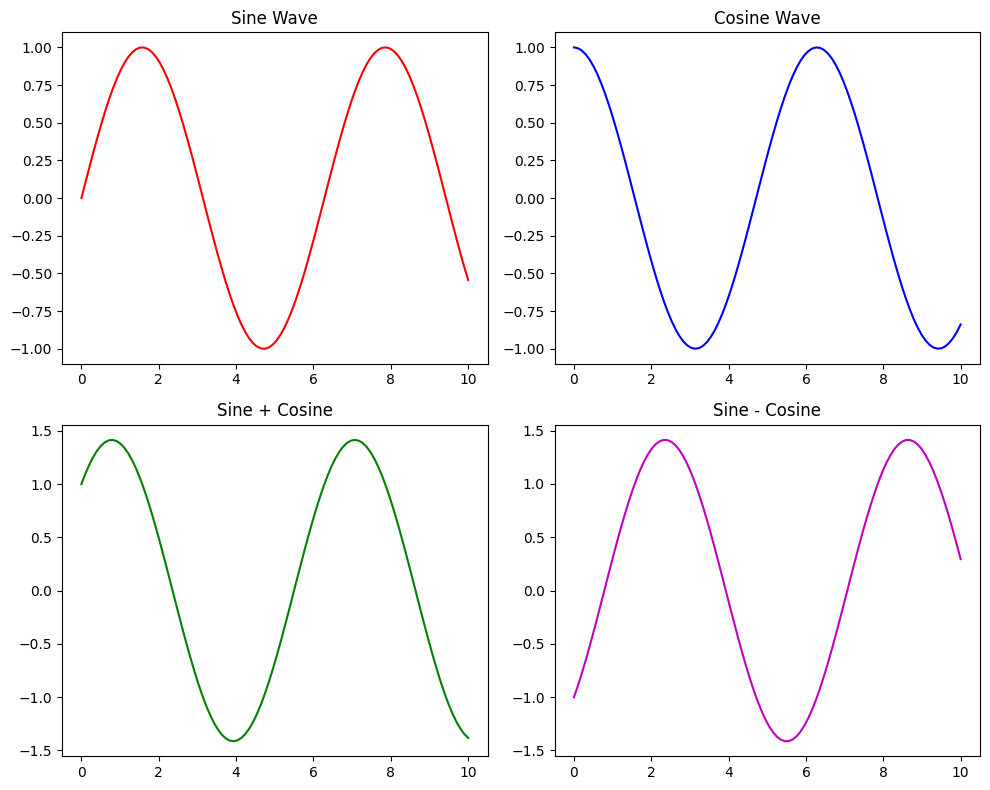

In [39]:
import numpy as np

x = np.linspace(0,10,100)
y1 = np.sin(x)
y2 = np.cos(x)

# subplots
fig, axs = plt.subplots(2,2, figsize=(10,8))

axs[0, 0].plot(x, y1, 'r')
axs[0, 0].set_title('Sine Wave')

axs[0, 1].plot(x, y2, 'b')
axs[0, 1].set_title('Cosine Wave')

axs[1, 0].plot(x, y1 + y2, 'g')
axs[1, 0].set_title('Sine + Cosine')

axs[1, 1].plot(x, y1 - y2, 'm')
axs[1, 1].set_title('Sine - Cosine')

plt.tight_layout()
plt.show()
